# DC 2019- ُSuccessful Business Start

**Your Name:** Amin Aria



# Small buisinesses success


In [80]:
%matplotlib inline
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
DC19 = pd.read_csv('..\sbdc_data_merged.csv')

In [81]:
# Show the first 5 rows of data, just to demostrate it has loaded
DC19.head()

,Service Center,County,Initial Services Sought at First Visit,Attended Group Training?,"Total Counseling Time, hrs",Business Status,Impact: Capital Investments,Impact: Created New Jobs,Impact: Revenue Increase,Impact: Started Business,Company's Total employees,"Company's Gross Revenue, $",NAICS code,Ownership Gender,Owner's Hispanic Origin,Owner's Race,Industry Title,Number of Business Establishments,Region,center_region
0,Anne Arundel County,Anne Arundel,Counseling,No,3.50,Started with SBDC,0.0,0.0,0.0,Not applicable: Already in Business,1.0,60000,56,Male-Owned,Non-Hispanic,Black or African American,Administrative and Support and Waste Managemen...,"1,786,052",Corridor,Corridor
1,Anne Arundel County,Anne Arundel,Counseling,No,3.00,Started with SBDC,0.0,0.0,0.0,Yes,1.0,75000,54,Male-Owned,Hispanic,White/Caucasian,"Professional, Scientific, and Technical Services","2,083,645",Corridor,Corridor
2,Anne Arundel County,Anne Arundel,Counseling,No,0.75,In Business (> 1 year),0.0,0.0,0.0,Not applicable: Already in Business,3.0,150000,11,Male-Owned,Non-Hispanic,White/Caucasian,"Agriculture, Forestry, Fishing and Hunting","344,810",Corridor,Corridor
3,Anne Arundel County,Anne Arundel,Counseling,No,0.50,Pre-venture/Nascent,0.0,0.0,0.0,No,0.0,0,48,Male-Owned,Non-Hispanic,White/Caucasian,Transportation and Warehousing,"544,912",Corridor,Corridor
4,Anne Arundel County,Anne Arundel,Counseling,No,1.75,In Business (> 1 year),0.0,0.0,0.0,Not applicable: Already in Business,12.0,1200000,33,Male-Owned,Non-Hispanic,White/Caucasian,Manufacturing,"603,605",Corridor,Corridor


In [120]:
DC19['Impact: Started Business'].value_counts(normalize = True)
DC19[['Attended Group Training?','Impact: Started Business']][DC19['Attended Group Training?']=='Yes'].groupby(['Impact: Started Business']).size()
#DC19['Total Counseling Time, hrs'][(DC19['Impact: Started Business'] == 'Yes')]

Impact: Started Business
No                                     1668
Not applicable: Already in Business    2698
Yes                                     597
dtype: int64

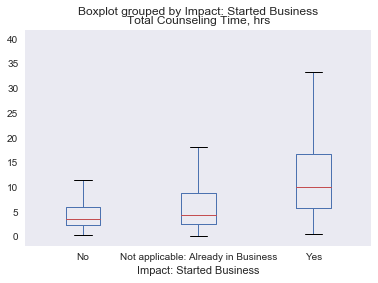

In [109]:
DC19[DC19['Total Counseling Time, hrs'] < 40].boxplot(column = 'Total Counseling Time, hrs', by ='Impact: Started Business',grid = False )

In [114]:
DC19[['Impact: Capital Investments','Impact: Started Business']].groupby(['Impact: Started Business'])\
.median()
#.agg(np.std,ddof=0)

,Impact: Capital Investments
Impact: Started Business,
No,0.0
Not applicable: Already in Business,0.0
Yes,5000.0


In [87]:
#####------GroupBy Statistics-----#####
#fig, ax = plt.subplots(figsize=(15,7))
   # (DC19['Impact: Capital Investments']<400000) ].\
    
A= DC19[(DC19['Impact: Started Business'] != 'Not applicable: Already in Business')] \
.groupby(['Industry Title','Impact: Started Business'], sort = True).size() \
.transform(lambda x: x/sum(x)) .unstack()
#A['Industry Title']=A.index
#plt.bar(A.index,A['Yes'],width = 0.3 )
A
#.unstack().plot(ax=ax,ylim=((0,0.02)))

Impact: Started Business,No,Yes
Industry Title,,
Accommodation and Food Services,0.087486,0.023099
Administrative and Support and Waste Management and Remediation Services,0.046381,0.017097
"Agriculture, Forestry, Fishing and Hunting",0.012368,0.002910
"Arts, Entertainment, and Recreation",0.038196,0.012368
Construction,0.032012,0.013459
Educational Services,0.026919,0.010731
Finance and Insurance,0.012004,0.003638
Health Care and Social Assistance,0.062386,0.020917
Information,0.018734,0.006184


In [88]:
####------Started Business Analysis-----#####
DC19start= DC19[DC19['Impact: Started Business']== 'Yes']
DC19start.shape

(1667, 20)

In [89]:
#####-----Correlation Box-----######
#####-----Correlation Box-----######
import seaborn as sns

#DC19start.corr()
#sns.pairplot(DC19start)
#sns.heatmap(DC19['County'],DC19['Service Center'])

In [90]:
dc19r=DC19[['County', 'Initial Services Sought at First Visit',
       'Attended Group Training?', 'Total Counseling Time, hrs',
       'Business Status', 'Impact: Capital Investments',
       'Impact: Created New Jobs', 'Impact: Revenue Increase','Company\'s Gross Revenue, $',
             'Industry Title', 'Ownership Gender', 'Owner\'s Race','Owner\'s Hispanic Origin']].copy()



In [91]:
####-----Handling categorical variables-----####
dc19rc=pd.get_dummies(dc19r, prefix=None, prefix_sep='_')
dc19rc.shape

(17079, 75)

# Classification Methods

In [92]:
####---- Data Pre-processing ----#####

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
le.fit(DC19['Impact: Started Business'])
y=le.transform(DC19['Impact: Started Business']\
               [DC19['Impact: Started Business'] != 'Not applicable: Already in Business'])
X= dc19rc[DC19['Impact: Started Business'] != 'Not applicable: Already in Business']

#size of training and cross-validation set
tset=int(0.8*X.shape[0])

##NEW Definition of Success including a positive Revenue Increase

ynew= (X['Impact: Revenue Increase']>0) & (y==2)

In [93]:
###----Input data for Impact excluded Analysis----###

dc19rno=DC19[['County', 'Initial Services Sought at First Visit',
       'Attended Group Training?', 'Total Counseling Time, hrs',
       'Business Status','Company\'s Gross Revenue, $',
             'Industry Title', 'Ownership Gender', 'Owner\'s Race','Owner\'s Hispanic Origin']].copy()
dc19rcno=pd.get_dummies(dc19rno, prefix=None, prefix_sep='_')
Xnoim= dc19rcno[DC19['Impact: Started Business'] != 'Not applicable: Already in Business']
Xnoim.head()

,"Total Counseling Time, hrs","Company's Gross Revenue, $",County_Allegany,County_Anne Arundel,County_Baltimore,County_Baltimore City,County_Calvert,County_Caroline,County_Carroll,County_Cecil,...,Owner's Race_Alaska Native,Owner's Race_Asian,Owner's Race_Black or African American,Owner's Race_Choose not to respond,Owner's Race_Native American,Owner's Race_Native Hawaiian or Pacific Islander,Owner's Race_White/Caucasian,Owner's Hispanic Origin_Choose not to respond,Owner's Hispanic Origin_Hispanic,Owner's Hispanic Origin_Non-Hispanic
1,3.000000,75000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.500000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
13,30.166667,60000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15,1.500000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
20,2.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# Multinomial Logistic Regression

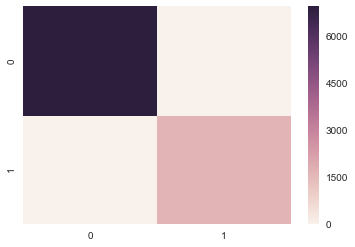

In [95]:
####------Multinomial logistic Regression------#####


from sklearn.linear_model import LogisticRegressionCV


clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(Xnoim.head(tset), y[0:tset])
#for the new definition of success
#.fit(X,ynew)

total=clf.predict(Xnoim)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, total))

In [97]:
###----Out of Sample Performance----####
logstart=clf.predict(Xnoim.tail(X.shape[0]-tset))
confusion_matrix(y[tset:X.shape[0]], logstart)
#fig, ax = plt.subplots(figsize=(15,7))
#plt.scatter(y[tset:X.shape[0]], logstart)

array([[1408,    0],
       [   0,  311]])

(array([   54853.23192726,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,  1261624.33432697]),
 array([ 0.99998481,  0.99998557,  0.99998633,  0.99998709,  0.99998785,
         0.99998861,  0.99998937,  0.99999013,  0.99999088,  0.99999164,
         0.9999924 ,  0.99999316,  0.99999392,  0.99999468,  0.99999544,
         0.9999962 ,  0.99999696,  0.99999772,  0.99999848,  0.99999924,  1.        ]),
 <a list of 20 Patch objects>)

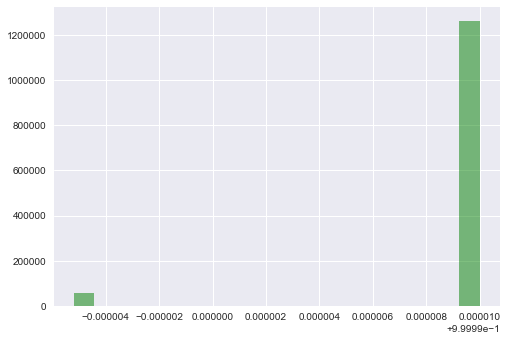

In [14]:
####----Probabilistic Prediction-----#######
logp=clf.predict_proba(Xnoim.tail(100))

ppre = pd.DataFrame(logp[:,1])
ppre=pd.concat([pd.DataFrame(y[(X.shape[0]-100):X.shape[0]]),ppre],axis=1)
ppre.columns=['Real','Probability']
ppre['Real']= ppre['Real']/2
plt.hist(ppre['Probability'][ppre['Real']==1.0],20,alpha=0.5, facecolor = 'g',label='Predicted Probability of Success',normed=True)
#ppre

# Random Forrest

In [15]:
###1-----Random Forrest ----1#####

from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf3.fit(X.head(tset), y[0:tset])
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
total3=clf3.predict(X)
confusion_matrix(y, total3)


array([[6927,    1],
       [  36, 1631]])

In [16]:
###----Out of Sample Performance----####
logstart3=clf3.predict(X.tail(X.shape[0]-tset))
confusion_matrix(y[tset:X.shape[0]], logstart3)

array([[1408,    0],
       [   5,  306]])

# SVM

In [17]:
###1-----Support Vector Machine ----1#####

from sklearn.svm import SVC

clf2 = SVC(gamma='auto')
clf2.fit(X.head(tset), y[0:tset]) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
total2=clf2.predict(X)
confusion_matrix(y, total2)


array([[6899,   29],
       [  38, 1629]])

In [18]:
###----Out of Sample Performance----####
logstart2=clf2.predict(X.tail(X.shape[0]-tset))
confusion_matrix(y[tset:X.shape[0]], logstart2)

array([[1380,   28],
       [   8,  303]])

# Feature Selection (Most Important Ones)

In [19]:
#####----- Univariate Selection-------####

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
# feature extraction
test = SelectKBest(score_func=chi2, k=4)

###=------Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xnoim)
Xtrans=scaler.transform(Xnoim)

fit = test.fit(Xtrans, y)
# summarize scores
np.set_printoptions(precision=3)
Best_Features = pd.DataFrame(fit.scores_)
Best_Features=pd.concat([pd.DataFrame(Xnoim.columns),Best_Features],axis=1)
Best_Features.columns=['feature','score']
Best_Features=Best_Features.sort_values(by=['score'],ascending= False)
#print(fit.scores_)
#features = fit.transform(X)
# summarize selected features
print(Best_Features[0:10])

                                          feature        score
34              Business Status_Started with SBDC  5992.907019
32            Business Status_Pre-venture/Nascent  1667.000000
33    Business Status_Start-up (in bus. < 1 year)   490.404319
31         Business Status_In Business (> 1 year)   444.688662
55         Ownership Gender_Choose not to respond   184.694786
60                   Ownership Gender_Woman-Owned   148.557081
30                   Attended Group Training?_Yes    70.236316
3                             County_Anne Arundel    67.643437
0                      Total Counseling Time, hrs    66.082508
61  Ownership Gender_Woman-Owned (WOSB) Certified    54.027594


# Regression for Prediction of Increased Revenue

It is likely that regression analysis provide more accuracy on industry-wise data

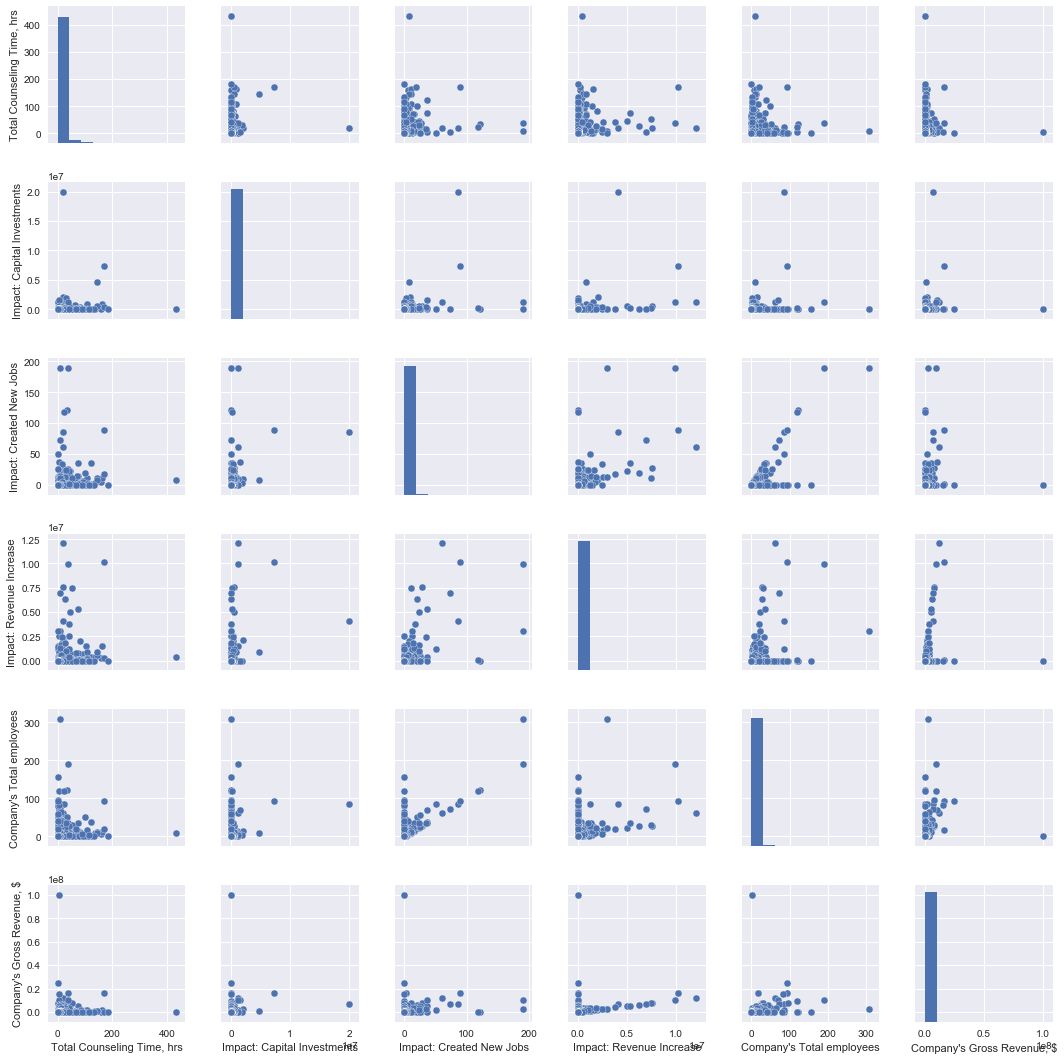

In [20]:
DC19PST=DC19[DC19['Industry Title']=='Professional, Scientific, and Technical Services']
DC19PST=pd.DataFrame(DC19PST)
sns.pairplot(DC19PST._get_numeric_data())

#DC19['Industry Title'].groupby

In [53]:
from sklearn import linear_model

#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, y_train)
#'Not applicable: Already in Business'

Xri = DC19PST[(DC19PST['Impact: Started Business'] =='Not applicable: Already in Business')\
              & (DC19PST['Impact: Revenue Increase'] < 250000 ) ]

#Xri = Xri[['County', 'Initial Services Sought at First Visit',
#          'Attended Group Training?', 'Impact: Created New Jobs','Total Counseling Time, hrs',
#       'Business Status', 'Company\'s Total employees',
#       'Company\'s Gross Revenue, $', 'Ownership Gender', 'Owner\'s Race', 'Industry Title']]

Xri=pd.get_dummies(Xri, prefix=None, prefix_sep='_')
yri = DC19PST['Impact: Revenue Increase']\
 [(DC19PST['Impact: Started Business'] == 'Not applicable: Already in Business')\
     & (DC19PST['Impact: Revenue Increase'] < 250000 )] 
    
yci = DC19PST['Impact: Capital Investments']\
[DC19PST['Impact: Started Business'] == 'Not applicable: Already in Business']
        

scaler.fit(Xri)
Xritr=scaler.transform(Xri) 
Xritr=pd.DataFrame(Xritr)
Xritr.columns=Xri.columns

#training and testing set
tset2=int(0.7*Xri.shape[0])

#Xritr = SelectKBest(chi2, k=2).fit_transform(Xritr, yri)
lm = linear_model.RidgeCV(alphas=(0.1,1,10))
model = lm.fit(Xritr.head(tset), yri[0:tset])

#y_pred = lm.predict(X_test)
#print(y_pred)
print(lm.score(Xritr.head(tset2), yri[0:tset2]))
print(lm.score(Xritr.tail(Xri.shape[0]-tset2),yri[tset2:Xritr.shape[0]]))
print("\n")

0.999977030564
0.999972368485




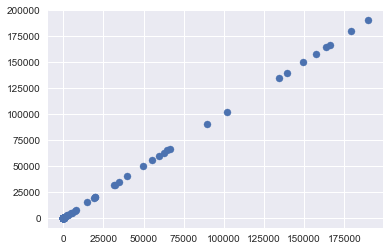

In [122]:
y_pred = lm.predict(Xritr.tail(Xri.shape[0]-tset2))
plt.scatter(y_pred,yri[tset2:Xritr.shape[0]],s=50)
plt.xlabel="Predicted increase in Revenue"
plt.ylabel ='Real increase in Revenue'
plt.show()

In [40]:
DC19PST.columns

Index(['Service Center', 'County', 'Initial Services Sought at First Visit',
       'Attended Group Training?', 'Total Counseling Time, hrs',
       'Business Status', 'Impact: Capital Investments',
       'Impact: Created New Jobs', 'Impact: Revenue Increase',
       'Impact: Started Business', 'Company's Total employees',
       'Company's Gross Revenue, $', 'NAICS code', 'Ownership Gender',
       'Owner's Hispanic Origin', 'Owner's Race', 'Industry Title',
       'Number of Business Establishments', 'Region', 'center_region'],
      dtype='object')